# IMPORT LIBRARY

In [30]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
import pathlib

# Load Dataset lokal

In [31]:
base_dir = 'Dataset'

# AUGMENTASI TRAIN TEST, Serta split validation 0.2

In [32]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Menyiapkan data latih dan validasi dari kumpulan data gambar yang di-load dalam memori melalui fungsi flow()

In [33]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='training',
    classes=['Boot', 'Sandal', 'Shoe'],
)

validation_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    classes=['Boot', 'Sandal', 'Shoe'],
)


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


# Membuat model CNN

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


# SUMMARY DARI MODEL CNN

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 17, 17, 128)      

# MODEL COMPILE dan deklarasi Callback

Optimizer adam, loss categorical, dan metricnya akurasi

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train Model

In [37]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping_callback]
    )

Epoch 1/50
188/188 [==============================] - 131s 692ms/step - loss: 0.8303 - accuracy: 0.5993 - val_loss: 0.4761 - val_accuracy: 0.8227
Epoch 2/50
188/188 [==============================] - 129s 685ms/step - loss: 0.4917 - accuracy: 0.7861 - val_loss: 0.2768 - val_accuracy: 0.8883
Epoch 3/50
188/188 [==============================] - 130s 689ms/step - loss: 0.3541 - accuracy: 0.8566 - val_loss: 0.2183 - val_accuracy: 0.9180
Epoch 4/50
188/188 [==============================] - 129s 685ms/step - loss: 0.2763 - accuracy: 0.8878 - val_loss: 0.2232 - val_accuracy: 0.9170
Epoch 5/50
188/188 [==============================] - 129s 684ms/step - loss: 0.2472 - accuracy: 0.9065 - val_loss: 0.1049 - val_accuracy: 0.9657
Epoch 6/50
188/188 [==============================] - 128s 679ms/step - loss: 0.2007 - accuracy: 0.9245 - val_loss: 0.1594 - val_accuracy: 0.9427
Epoch 7/50
188/188 [==============================] - 127s 677ms/step - loss: 0.1848 - accuracy: 0.9293 - val_loss: 0.1112 -

# VISUALISASI ACCURACY

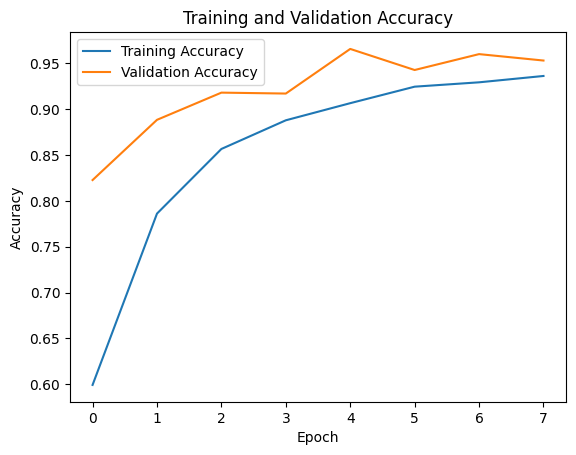

In [38]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# VISUALISASI LOSS

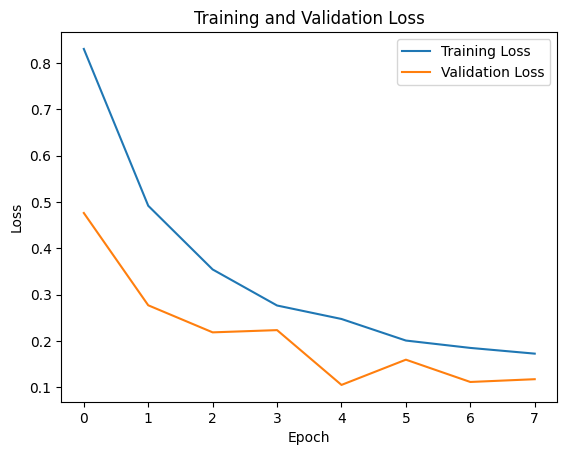

In [39]:
# Plot training and validation accuracy values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# SAVE MODEL

In [40]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

# Convert SavedModel menjadi alas_kaki.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('alas_kaki.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


54127680